### [ココ](FFT.html)は理解してください。

In [21]:
import common
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## ここでけ，ファイル名を指定する。
name = ["/Users/mypc/Desktop/0515ohnishi/181P090_1.csv","/Users/mypc/Desktop/0515ohnishi/181P090_2.csv"]
ff = ["open","close"]

In [3]:
def COP(fname,figname):
    datcop=common.Text2Numpy(filename=fname)
    r = common.FFT_cop(hz=14,df=datcop["cop"],start=900,end=3000,bias=False,sampling=0.01)[:,1:3]
    matrix,center,ang,d0,d1 = common.COPpca(r)
    common.FIGshow(figname,d0,d0@common.Rotation(matrix))
    dat = d0@common.Rotation(matrix)
    #矩形面積と総軌跡長
    a = np.max(dat,axis=0)-np.min(dat,axis=0)
    rectarea = a[0]*a[1]
    dat1 = np.diff(dat,axis=0)
    #dist = lambda x:np.sqrt(x[0]**2+x[1]**2)
    #dat2 = list(map(dist,dat1))
    #dat3 = sum(dat2)
    totaltraj = np.sum(np.linalg.norm(dat1,ord=2,axis=1))
    print(f"矩形面積:{rectarea}")
    print(f"総軌跡長：{totaltraj}")
    print(f"補正した角度：{ang}")
    print(f"中心点：x_{center[0]},y_{center[1]}")

open

[0.89408819 0.10591181]
[[ 9.99999921e-01  3.96456613e-04]
 [-3.96456613e-04  9.99999921e-01]]


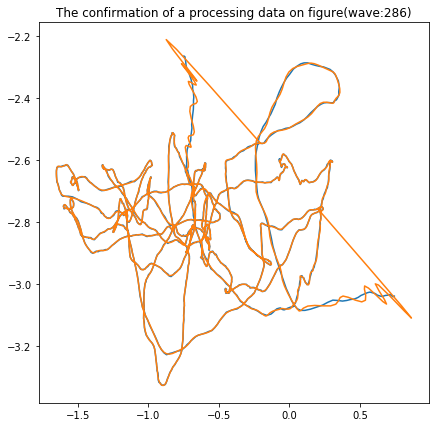

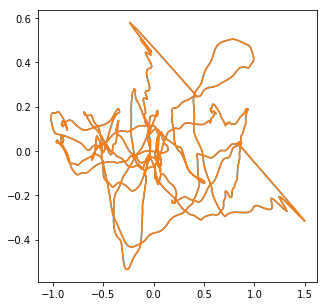

矩形面積:2.807946170854325
総軌跡長：23.473475402996176
補正した角度：0.022715291304827606
中心点：x_-0.63399609375,y_-2.7930668945312496



close

[0.60667787 0.39332213]
[[-0.99086725 -0.13484098]
 [ 0.13484098 -0.99086725]]


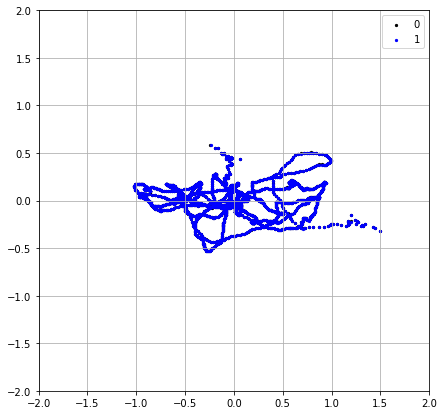

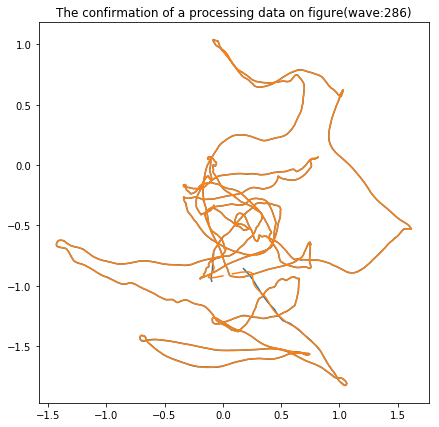

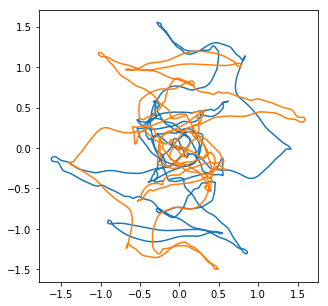

矩形面積:9.076462385038795
総軌跡長：31.625981136439876
補正した角度：172.25057510238656
中心点：x_0.19960546874999952,y_-0.5153212890625





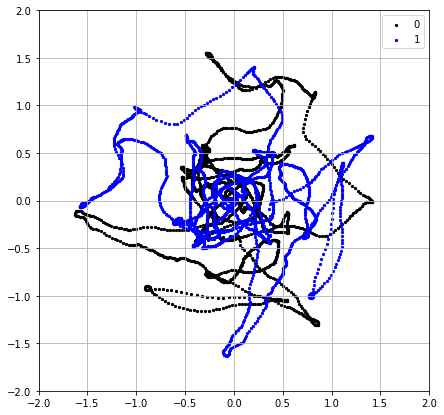

In [4]:
for n1,n2 in zip(name,ff):
    print(f"{n2}\n")
    COP(n1,n2)
    print("\n\n")

[0.89408819 0.10591181]
[[ 9.99999921e-01  3.96456613e-04]
 [-3.96456613e-04  9.99999921e-01]]


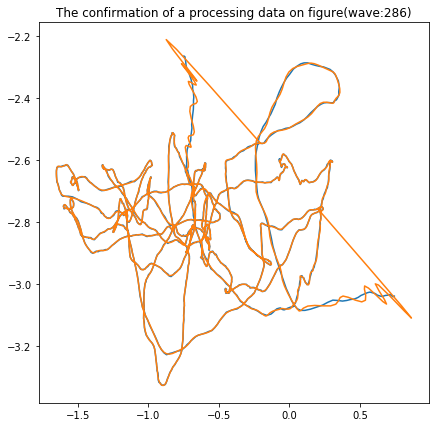

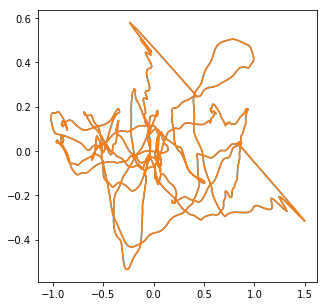

矩形面積:8.722915374492139
総軌跡長：31.62598113643987
補正した角度：0.022715291304827606
中心点：x_-0.63399609375,y_-2.7930668945312496


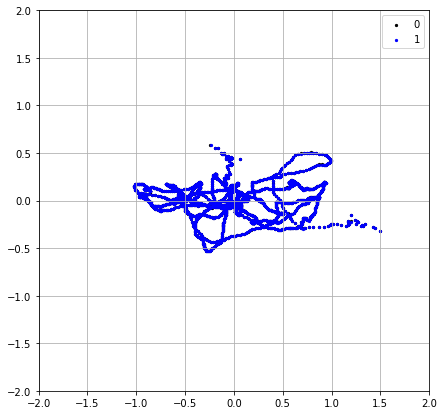

In [15]:
fname = "/Users/mypc/Desktop/0515ohnishi/181P090_1.csv"

datcop=common.Text2Numpy(filename=fname)
r = common.FFT_cop(hz=14,df=datcop["cop"],start=900,end=3000,bias=False,sampling=0.01)[:,1:3]
matrix,center,ang,d0_1,d1_1 = common.COPpca(r)
common.FIGshow("",d0_1,d0_1@common.Rotation(matrix))
dat = d0@common.Rotation(matrix)
#矩形面積と総軌跡長
a = np.max(dat,axis=0)-np.min(dat,axis=0)
rectarea = a[0]*a[1]
dat1 = np.diff(dat,axis=0)
#dist = lambda x:np.sqrt(x[0]**2+x[1]**2)
#dat2 = list(map(dist,dat1))
#dat3 = sum(dat2)
totaltraj = np.sum(np.linalg.norm(dat1,ord=2,axis=1))
print(f"矩形面積:{rectarea}")
print(f"総軌跡長：{totaltraj}")
print(f"補正した角度：{ang}")
print(f"中心点：x_{center[0]},y_{center[1]}")

(array([ 35.,  44., 196., 272., 570., 519., 294.,  56.,  40.,  22.]),
 array([-0.53425249, -0.42271536, -0.31117822, -0.19964109, -0.08810395,
         0.02343318,  0.13497032,  0.24650746,  0.35804459,  0.46958173,
         0.58111886]),
 <a list of 10 Patch objects>)

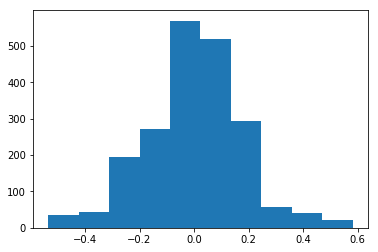

In [24]:
plt.hist(d1_1[:,1])

(array([161., 180., 280., 440., 393., 184., 214., 175.,  12.,   9.]),
 array([-1.01864226, -0.76685152, -0.51506078, -0.26327005, -0.01147931,
         0.24031143,  0.49210216,  0.7438929 ,  0.99568364,  1.24747438,
         1.49926511]),
 <a list of 10 Patch objects>)

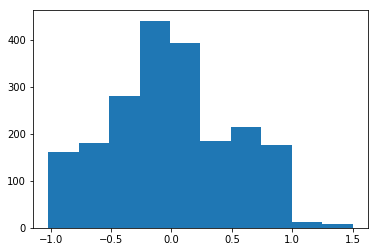

In [25]:
plt.hist(d1_1[:,0])

[0.61020746 0.38979254]
[[-0.99199943 -0.12624235]
 [ 0.12624235 -0.99199943]]


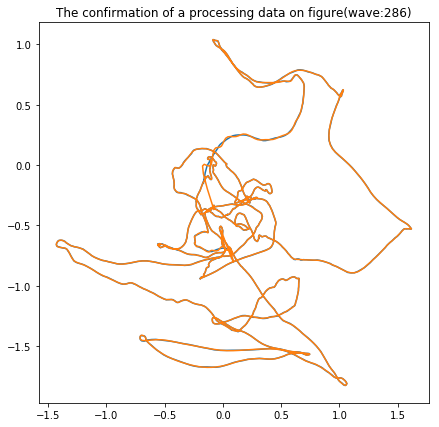

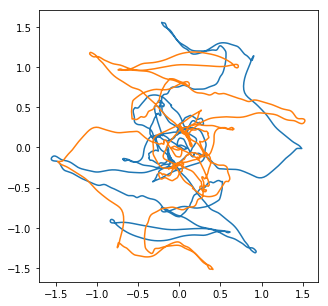

矩形面積:9.069030154768049
総軌跡長：29.547670932620534
補正した角度：172.74749422343368
中心点：x_0.12901171874999987,y_-0.5155488281250001


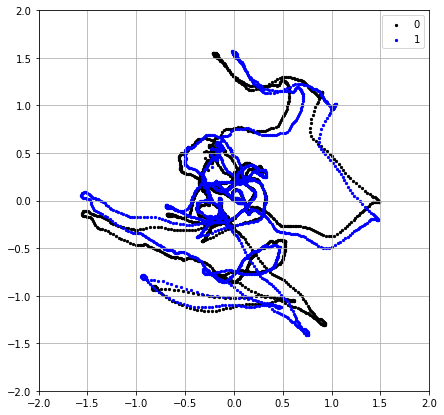

In [42]:
fname = "/Users/mypc/Desktop/0515ohnishi/181P090_2.csv"

datcop=common.Text2Numpy(filename=fname)
r = common.FFT_cop(hz=14,df=datcop["cop"],start=300,end=2500,bias=False,sampling=0.01)[:,1:3]
matrix,center,ang,d0,d1 = common.COPpca(r)
common.FIGshow("",d0,d0@common.Rotation(matrix,1))
dat = d0@common.Rotation(matrix,1)
#矩形面積と総軌跡長
a = np.max(dat,axis=0)-np.min(dat,axis=0)
rectarea = a[0]*a[1]
dat1 = np.diff(dat,axis=0)
#dist = lambda x:np.sqrt(x[0]**2+x[1]**2)
#dat2 = list(map(dist,dat1))
#dat3 = sum(dat2)
totaltraj = np.sum(np.linalg.norm(dat1,ord=2,axis=1))
print(f"矩形面積:{rectarea}")
print(f"総軌跡長：{totaltraj}")
print(f"補正した角度：{ang}")
print(f"中心点：x_{center[0]},y_{center[1]}")

In [43]:
np.arctan(-0.13484098/-0.99086725 )*180/np.pi

7.749424647925729

In [44]:
np.rad2deg(np.arccos(-0.13484098))

97.74942463626887

In [45]:
np.arctan2(-0.99086725, -0.13484098)*180/np.pi

-97.74942464792574

(array([112.,  78.,  40., 123., 382., 447., 367., 169., 160., 170.]),
 array([-1.5162223 , -1.24589338, -0.97556446, -0.70523554, -0.43490662,
        -0.1645777 ,  0.10575122,  0.37608014,  0.64640906,  0.91673798,
         1.1870669 ]),
 <a list of 10 Patch objects>)

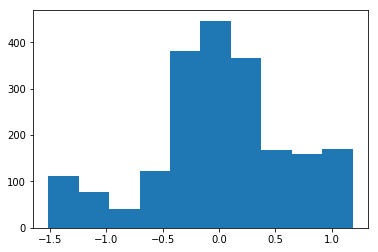

In [46]:
plt.hist(d1[:,1])

(array([ 41.,  64., 204., 366., 476., 511., 279.,  45.,  22.,  40.]),
 array([-1.40742246, -1.10730923, -0.807196  , -0.50708277, -0.20696954,
         0.09314369,  0.39325692,  0.69337015,  0.99348338,  1.29359661,
         1.59370984]),
 <a list of 10 Patch objects>)

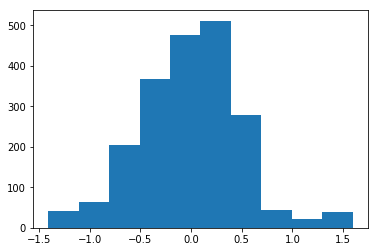

In [28]:
plt.hist(d1[:,0])

(array([1519.,  307.,   57.,   46.,   28.,   17.,   20.,   26.,   13.,
          15.]),
 array([-0.24531998,  0.00867112,  0.26266222,  0.51665332,  0.77064441,
         1.02463551,  1.27862661,  1.53261771,  1.7866088 ,  2.0405999 ,
         2.294591  ]),
 <a list of 10 Patch objects>)

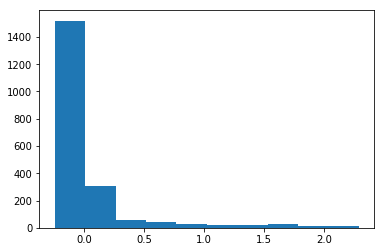

In [40]:
plt.hist(d1[:,0]**2-np.sum(d1[:,0]**2)/len(d1[:,0]))

(array([1285.,  212.,  143.,   50.,  109.,   53.,  100.,   45.,   19.,
          32.]),
 array([-0.37839275, -0.15260758,  0.07317759,  0.29896276,  0.52474793,
         0.7505331 ,  0.97631827,  1.20210344,  1.42788861,  1.65367378,
         1.87945894]),
 <a list of 10 Patch objects>)

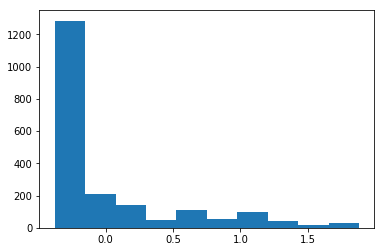

In [41]:
plt.hist(d1[:,1]**2-np.sum(d1[:,1]**2)/len(d1[:,1]))